# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [41]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [6]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [11]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

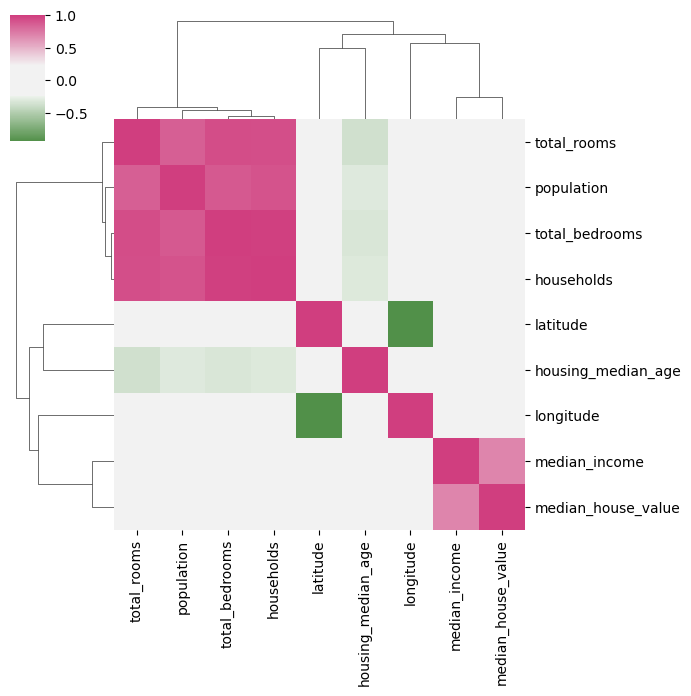

In [13]:
df_numericos = df.select_dtypes(include=['float64','int64'])

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap((df_numericos.corr()), figsize=(7,7), center=0, cmap=cmap)

Ha boa correlacao nos seguintes casos:
- Total rooms x Population
- Total rooms x Total Bedrooms
- Total rooms x households
- Population x Total bedrooms
- Population x households
- Total bedrooms x households
- Median income x median house values

Ha tambem uma forte correlacao negativa entre latitude e longitude, porem este caso nao possui relevancia visto que sao dados que se correlacionam por definicao.

In [15]:
df_numericos.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


### 3. Separe os dados em validação e teste

In [28]:
X = df.drop(columns = ['latitude','longitude','housing_median_age','median_house_value']).copy()
X = pd.get_dummies(X,drop_first=True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_rooms                 20640 non-null  float64
 1   total_bedrooms              20433 non-null  float64
 2   population                  20640 non-null  float64
 3   households                  20640 non-null  float64
 4   median_income               20640 non-null  float64
 5   ocean_proximity_INLAND      20640 non-null  bool   
 6   ocean_proximity_ISLAND      20640 non-null  bool   
 7   ocean_proximity_NEAR BAY    20640 non-null  bool   
 8   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(5)
memory usage: 887.0 KB
None


,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [30]:
y = df.loc[:,'median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [34]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [36]:
mse1 = regr_1.score(X_train,y_train)
mse2 = regr_2.score(X_train,y_train)

template = "O MSE da arvore com profundidade={0} eh: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da arvore com profundidade=2 eh: 0,49
O MSE da arvore com profundidade=8 eh: 0,69


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Considerando que a arvore com profundidade 2 possui um MSE menor e em torno de 0.49, possivelmente ele esta realizando uma maior generalizacao dos dados. Por outro lado a arvore com profundidade 8 pode estar produzindo um ajuste muito especifico para aquele conjunto de dados. Em conclusao, considerando o objetivo de produzir um resultado mais generalizado, considero a arvore com profundiade 2 mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

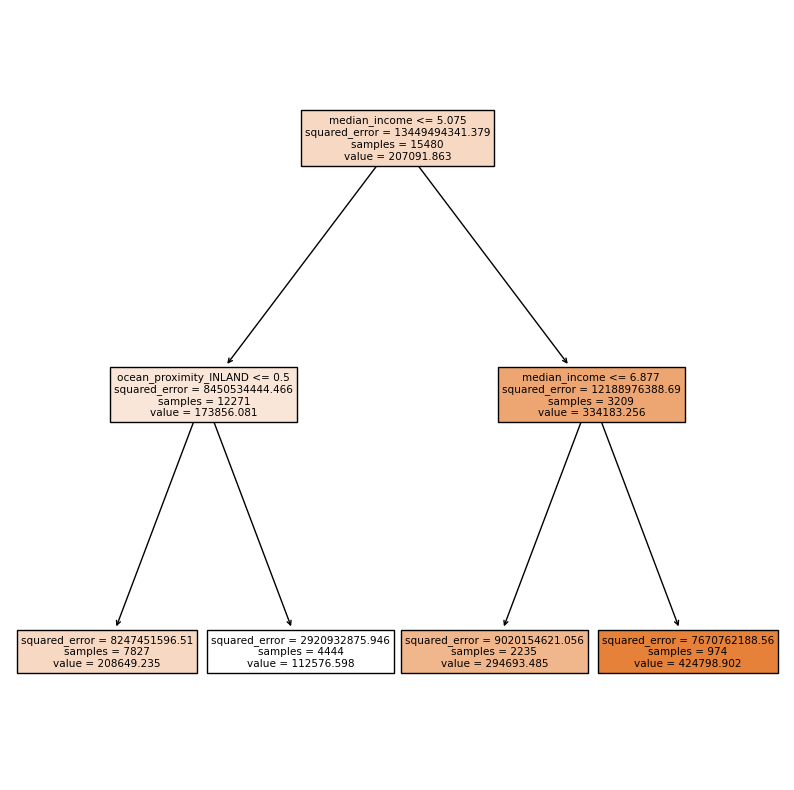

In [47]:
plt.rc('figure',figsize=(10,10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)